In [10]:
pip install nltk textblob pandas numpy preprocessor tweet-preprocessor tweepy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [11]:
import tweepy
from textblob import TextBlob
from preprocessor.api import clean
import statistics
from typing import List


consumer_key= "wLWx1N5HsEPWzqFTBVOncVndR"
consummer_secret = "QQiH5m2Oltjr5TsHjNOFJiMTAqGuAc0zRGUODL8h7NqK3WRbgV"

In [12]:
auth = tweepy.AppAuthHandler(consumer_key,consummer_secret)
api = tweepy.API(auth)

In [13]:
def get_tweets (keyword) ->List[str]:
    all_tweets = []
    for tweet in tweepy.Cursor(api.search_tweets,q=keyword,tweet_mode='extended', lang='en').items(50):
        all_tweets.append(tweet.full_text)
    return all_tweets

In [14]:
def clean_teets(all_tweets) -> List[str]:
    tweets_clean = []
    for tweet in all_tweets:
        tweets_clean.append(clean(tweet))
    return tweets_clean

In [15]:
def get_sentiment(all_tweets) -> List[float]:
    sentiment_scores = []
    for tweet in all_tweets:
        blob = TextBlob(tweet)
        blob = TextBlob(tweet)
        sentiment_scores.append(blob.sentiment.polarity)
    return sentiment_scores

In [16]:
def generate_average_sentiment_score(tweets) -> int:
    tweets_clean = clean_teets(tweets)
    sentiment_scores = get_sentiment(tweets_clean)
    import matplotlib.pyplot as plt
    
    
    average_score  = statistics.mean(sentiment_scores)
    plt.figure(figsize=(16,8))
    plt.title('Sentimiento de usuarios de Tweeter')
    sentiment_scores.sort()
    plt.plot(sentiment_scores)
    plt.xlabel('Usuario', fontsize=18)
    plt.ylabel('Sentimiento', fontsize=18)
    return average_score




50
0.1033238997113997 0.06191002886002885


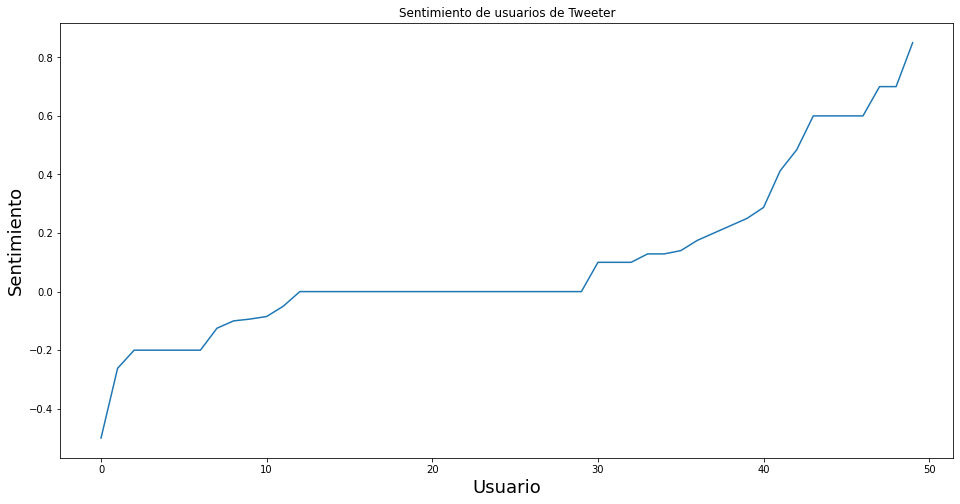

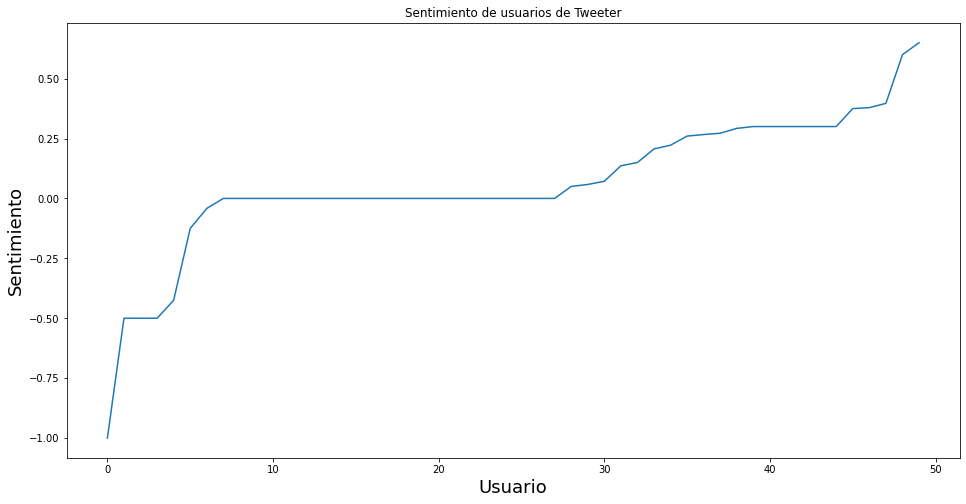

In [19]:
if __name__=='__main__':
    bitcoinTweets = get_tweets('bitcoin')
    ethereumTweets = get_tweets('ethereum')
    print(len(bitcoinTweets))
    print (generate_average_sentiment_score(bitcoinTweets),generate_average_sentiment_score(ethereumTweets))
    
    